In [1]:
import anndata as ad
import numpy as np
from scvi.model import SCVI


TABULA_SAPIENS_BY_CELL_TYPE_WITH_EMBEDS_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_with_embeds_new_norm.h5ad"
TABULA_SAPIENS_BY_CELL_TYPE_SCVI_MODEL = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_scvi_model_new_norm/"

adata = ad.read_h5ad(TABULA_SAPIENS_BY_CELL_TYPE_WITH_EMBEDS_PT)

Global seed set to 0
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
model = SCVI.load(TABULA_SAPIENS_BY_CELL_TYPE_SCVI_MODEL, adata=adata)

INFO     File /Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_featu
         res_scvi_model_new_norm/model.pt already downloaded                                 


/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [3]:
model

SCVI Model with the following params: 
n_hidden: 256, n_latent: 32, n_layers: 2, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Trained

In [4]:
latent = model.get_latent_representation()
adata.obsm["X_scVI"] = latent

In [5]:
import scanpy as sc


adata.layers["prediction"] = model.get_normalized_expression(
    library_size=1e5
)
sc.pp.log1p(adata, layer='prediction')

In [6]:
# df = model.differential_expression(groupby='label')
# TABULA_SAPIENS_BY_CELL_TYPE_SCVI_DE = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_scvi_model_new_norm_de.csv"
# df.to_csv(TABULA_SAPIENS_BY_CELL_TYPE_SCVI_DE)

In [12]:
from rosa.score import score_predictions
from rosa.plotting import plot_expression_and_correlation, plot_marker_gene_heatmap


adata_test, results = score_predictions(adata)

/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value



        mean pearsonr across genes 0.883
        mean pearsonr across cells 0.458
        mean square error 0.248
        mean percent total expression captured per cell 96.939
        


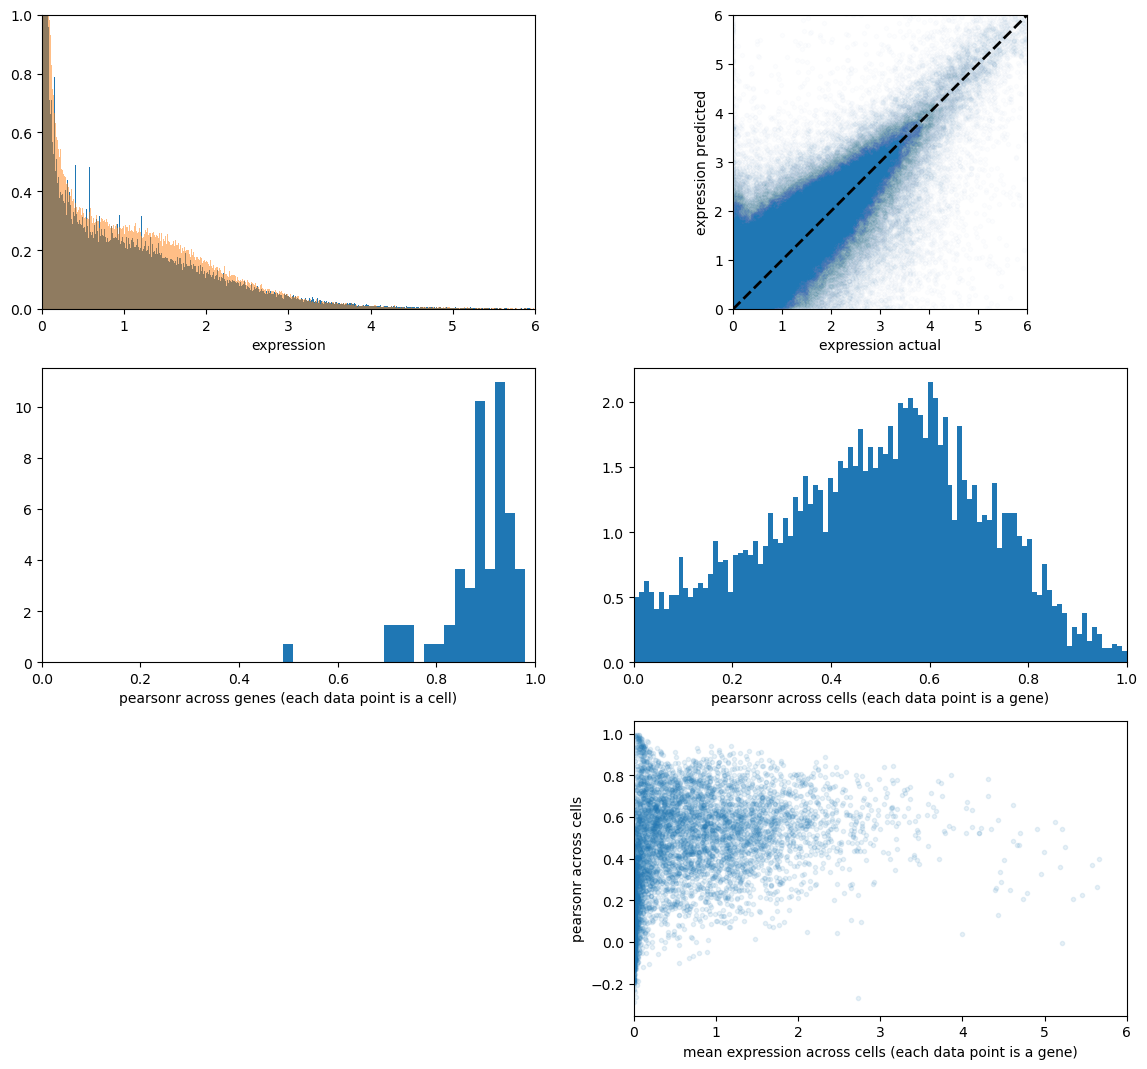

In [9]:
plot_expression_and_correlation(adata_test, results)

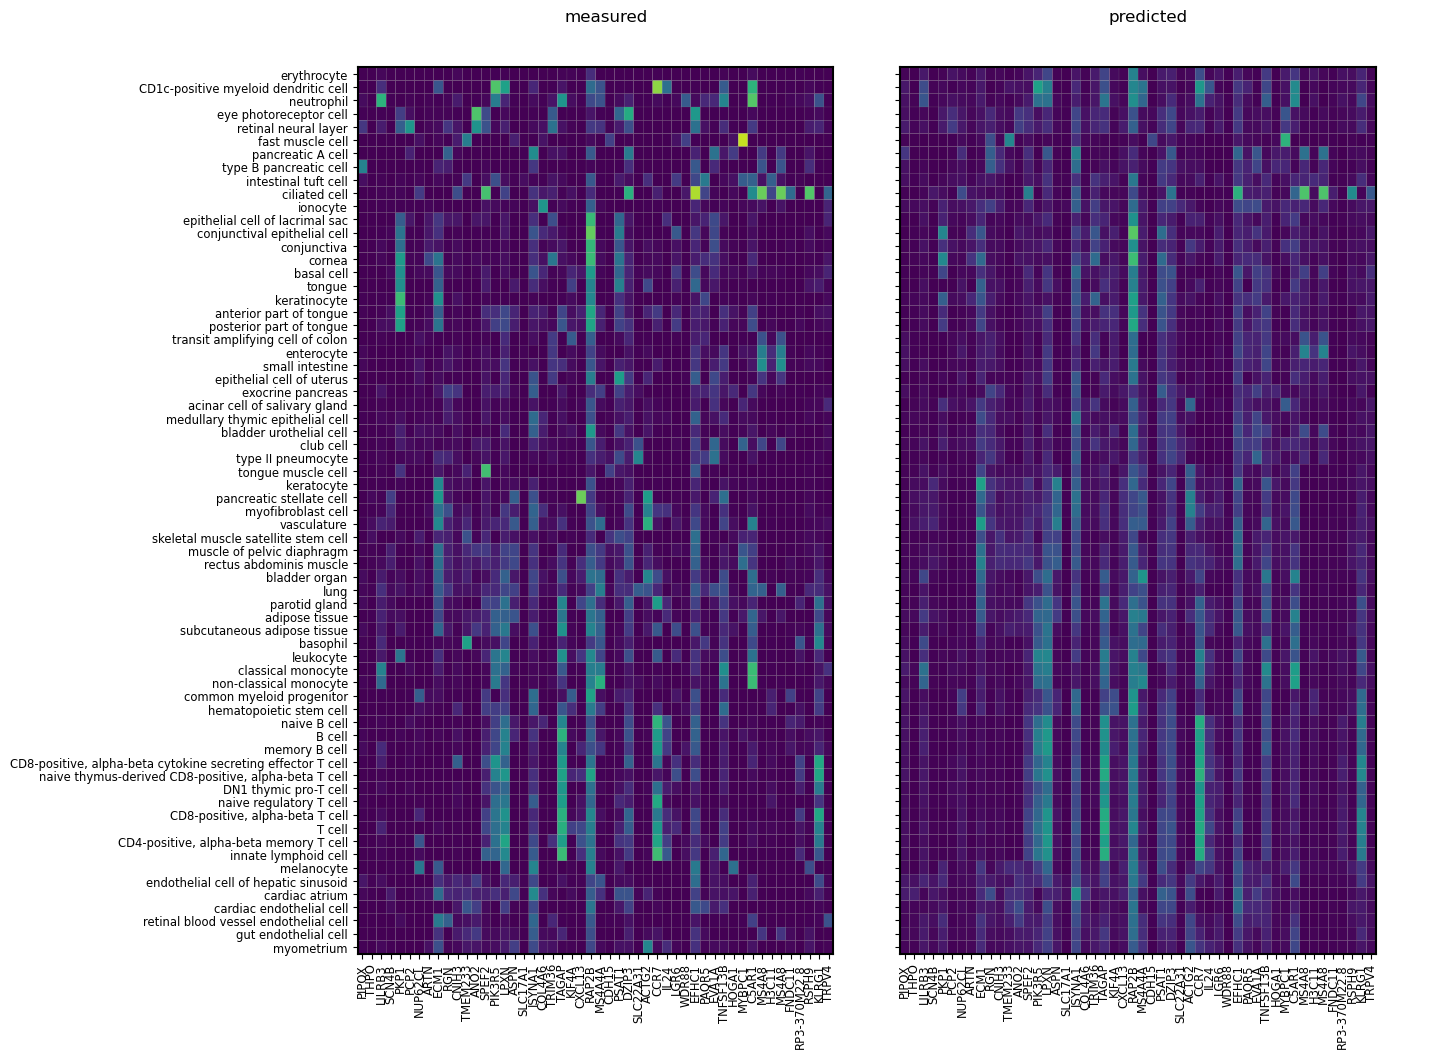

In [10]:
marker_genes = adata_test.var[adata_test.var['highly_variable']]['feature_name'].values
np.random.seed(42)
marker_genes = np.random.choice(marker_genes, 50)

plot_marker_gene_heatmap(adata_test, marker_genes)

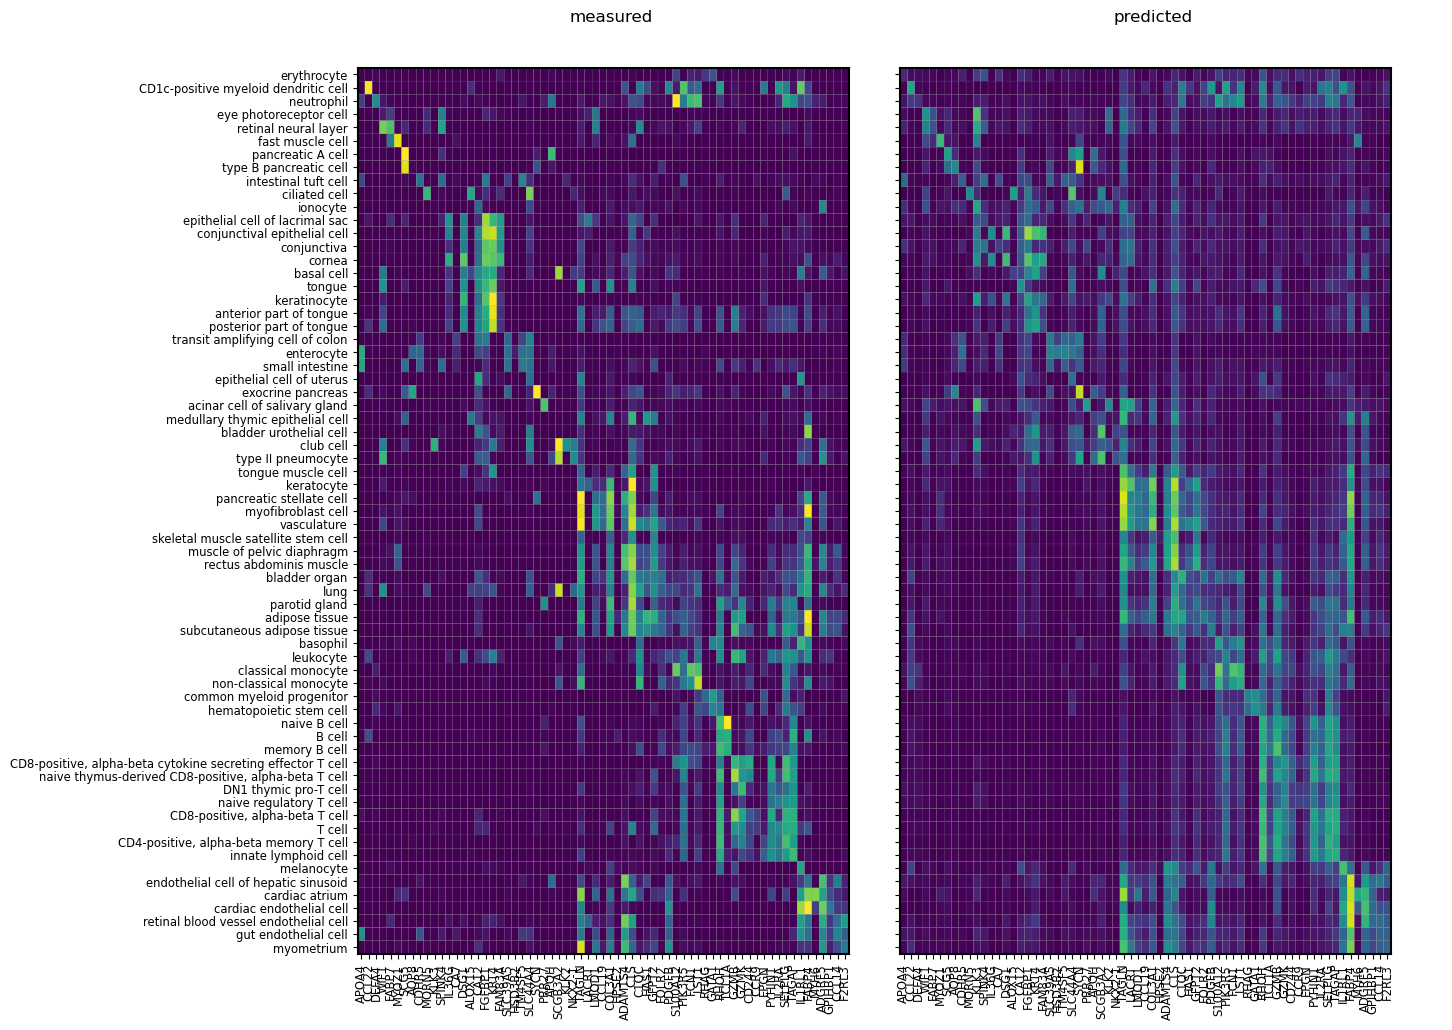

In [11]:
marker_genes_dict = adata_test.obs.set_index('label').to_dict()['marker_feature_name']
plot_marker_gene_heatmap(adata_test, marker_genes_dict)